# Introduction

In this notebook I have done the Exploratory Data Analysis of the famous **Iris** dataset and tried to gain useful insights from the data.

The features present in the dataset are:
- Sepal Width
- Sepal Length
- Petal Width
- Petal Length




## Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Loading Data

In [29]:
iris_df = pd.read_csv("IRIS.csv")

## Understanding the Data

In [30]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
iris_df.shape

(150, 5)

We observe from this above line that our dataset has 150 rows and 5 columns

In [32]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [33]:
# Further inspecting the dataframe
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(iris_df)

,Data Type,No of Levels,Levels
sepal_length,float64,35,[5.1 4.9 4.7 4.6 5.0 5.4 4.4 4.8 4.3 5.8 5.7 5...
sepal_width,float64,23,[3.5 3.0 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.0 4.4 3...
petal_length,float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.0 1.9 4.7 4.5 4...
petal_width,float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.0 1...
species,object,3,['Iris-setosa' 'Iris-versicolor' 'Iris-virgini...


Lets gain some more information about our dataset

In [34]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We see all the columns of our data set are free from null values and four of them are numeric while one is categorical column which also be seen by the dtypes function

In [35]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Satistical Insights

In [36]:
iris_df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [37]:
iris_df.describe() #Performing just for numeric columns

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking for Duplicate values

In [38]:
iris_df.duplicated().sum() # Total no of duplicates in the dataset

3

In [39]:
iris_df[iris_df.duplicated()] #This shows the actual duplicate rows

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


There are 3 duplicates in our dataset but removing them might break the balance of our dataset as we see that our dataset is balanced as in the describe function for the species column we saw frequency of 50 which can be further proved by the following line of code.

In [40]:
iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

So we can let the duplicate values as they are and proceed

## Checking missing values

We confirmed through the info funtion that our dataset is free from null values but let us further justify it

In [41]:
iris_df.isnull().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Estimating Skewness and Kurtosis¶

In [42]:
iris_df.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [43]:
iris_df.kurt()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64

## Visualisations on target column

Our target column is the species column because in the end we want to predict the correct species of flower

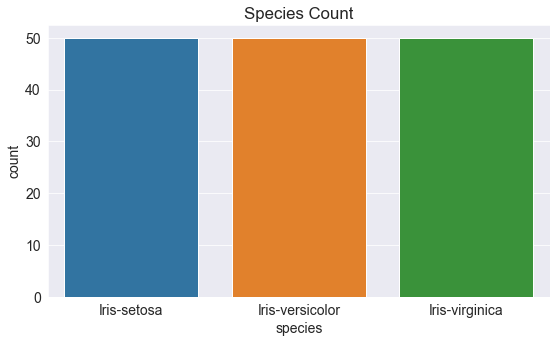

In [44]:
plt.title('Species Count')
sns.countplot(iris_df['species']);

This further tells that our dataset is balanced with equal records for all three species

## Visualising relations between variables

Lets compare the sepal length and sepal width columns

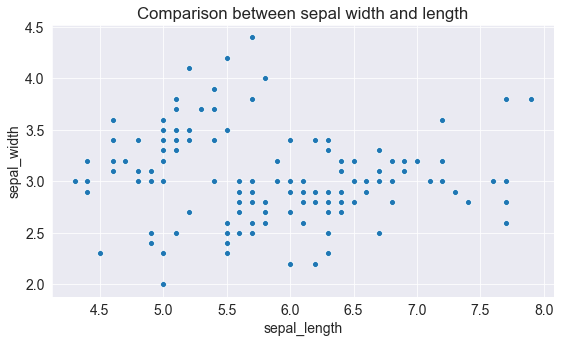

In [56]:
plt.title('Comparison between sepal width and length')
sns.scatterplot(iris_df['sepal_length'], iris_df['sepal_width']);

Lets compare them again but this time lets compare on the basis on species as well

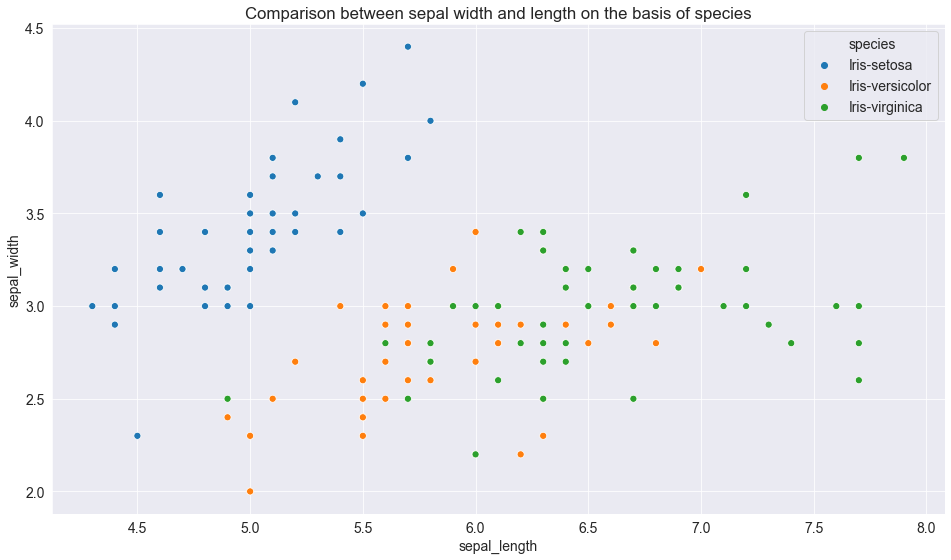

In [57]:
plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(iris_df['sepal_length'], iris_df['sepal_width'], hue = iris_df['species'], s= 50);

From above visualization we can tell that the iris-setosa species has smaller sepal length but higher width . While we see versicolor lies in almost middle for length as well as width. While Virginica has larger sepal lenghts and smaller sepal widths

Lets compare the petal length and petal width columns

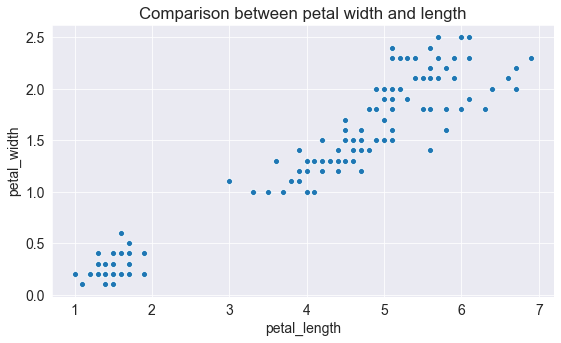

In [58]:
plt.title('Comparison between petal width and length')
sns.scatterplot(iris_df['petal_length'], iris_df['petal_width']);

We can see two separate clusters but not sure about the species so lets bring the species into the equation as well.

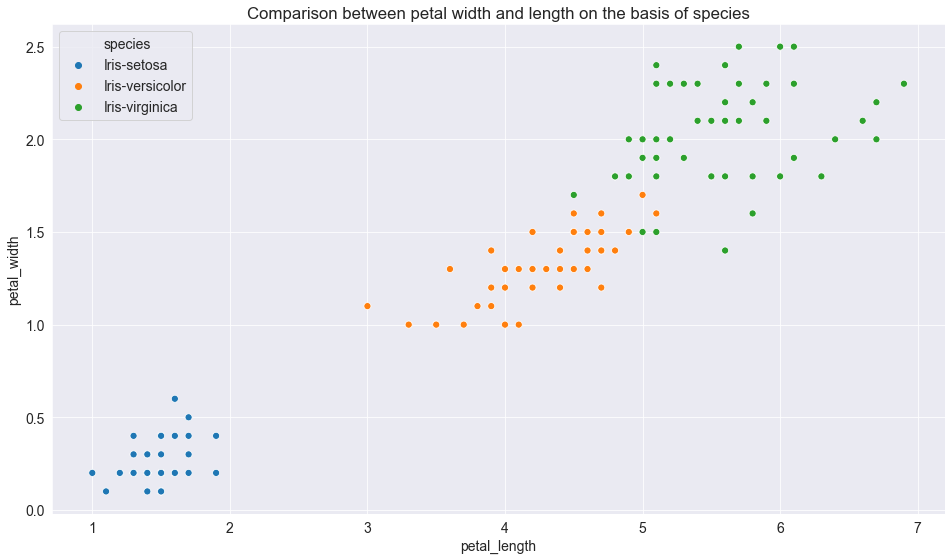

In [59]:
plt.figure(figsize=(16,9))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(iris_df['petal_length'], iris_df['petal_width'], hue = iris_df['species'], s= 50);

We see that setosa has the smallest petal length as well as petal widths, while versicolor has average petal length and petal width while the virginica species has the highest petal length as well as petal width

Now lets visualize all the columns realtionship using pairplots

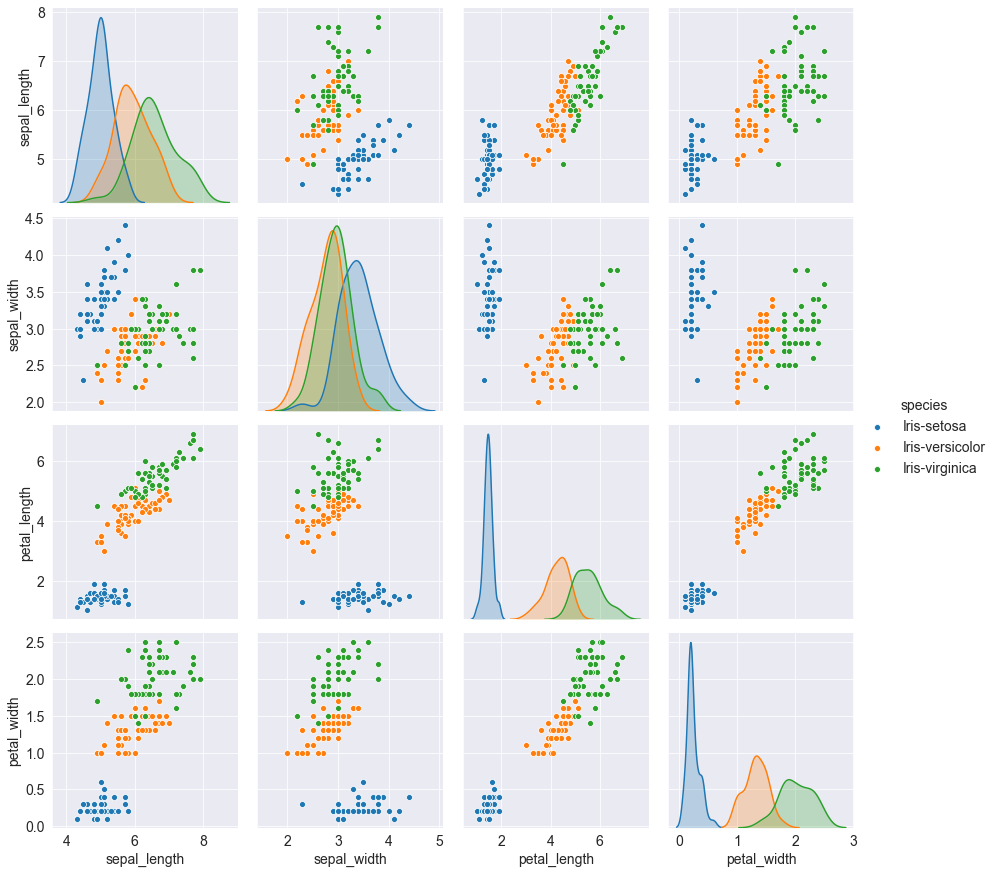

In [64]:
sns.pairplot(iris_df,hue="species",height=3);

Pairplot represents the relationship between our target and the variables. We can see that the setosa species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other species like the versicolor species usually have average dimensions whether its is sepal or pedal. While virginica has high pedal width and length while it has small sepal width but large sepal length.

## Differentiating Numerical and Categorical Variables

In [65]:
categorical_columns = iris_df.dtypes[iris_df.dtypes == 'object'].index
print('No of categorical fetures:',len(categorical_columns),'\n')
print(categorical_columns)
print('*'*100)

numerical_columns = iris_df.dtypes[iris_df.dtypes != 'object'].index
print('No of numerical fetures:',len(numerical_columns),'\n')
print(numerical_columns)

No of categorical fetures: 1 

Index(['species'], dtype='object')
****************************************************************************************************
No of numerical fetures: 4 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


This function just further supports our earlier observations

## Summary of Numeric Features

In [66]:
iris_df[numerical_columns].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see that the mean and median values dont have a large differnce among their values so no data transformation is required.

## Correlation Between Variables

In [71]:
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Further we can visualise this correlation using a heatmap

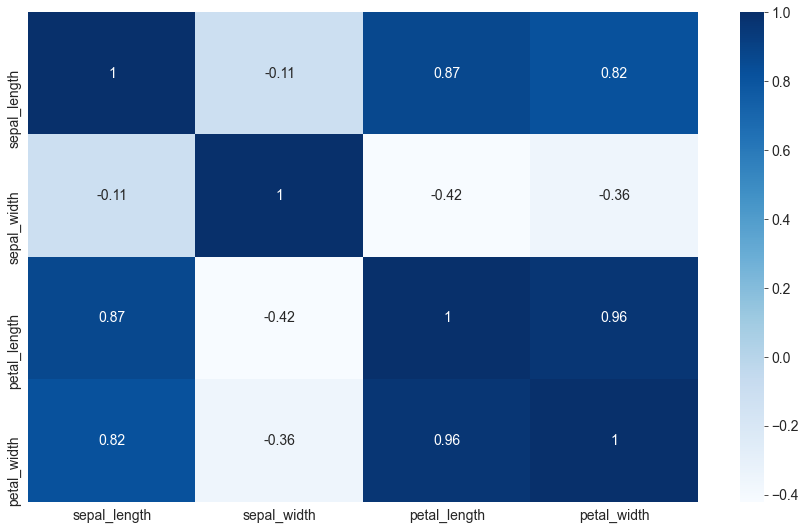

In [72]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(iris_df.corr(), cmap='Blues', annot = True);

From the above heatmap we see that petal_length and petal_width have high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations

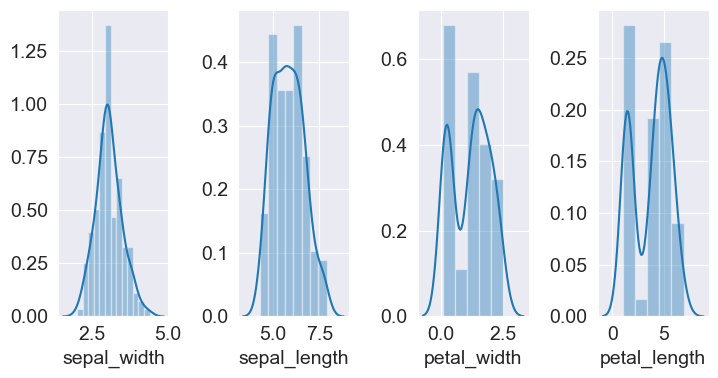

In [78]:
cols = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.distplot(iris_df[col])
    i = i+1
plt.tight_layout()
plt.show()

We can observe the distribution of our columns through this distplot which shows that follow normal distribution

## Histograms

Lets see the distribution of data for the various columns of our data set

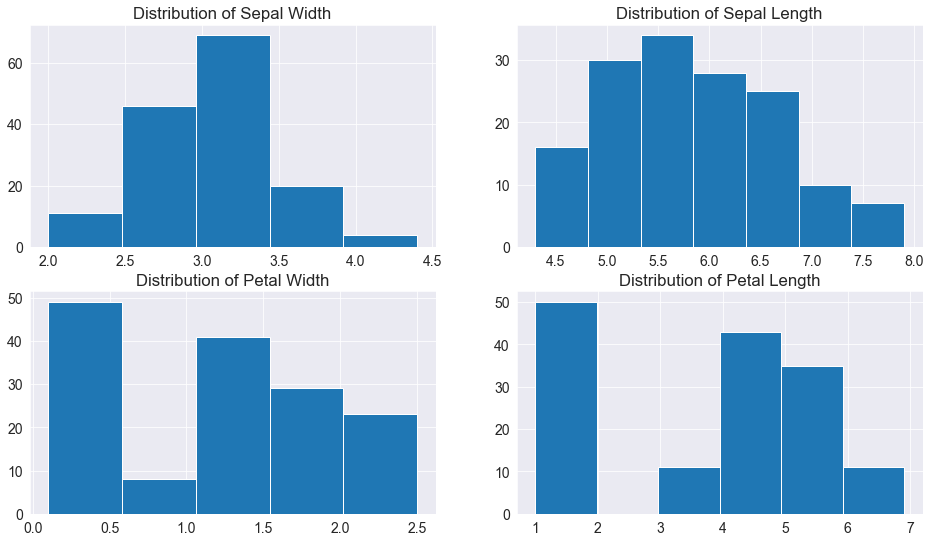

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(iris_df['sepal_width'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(iris_df['sepal_length'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris_df['petal_width'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris_df['petal_length'], bins=6);

- The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
- The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
- The Highest frequency of petal width is between 0 to 0.5 which is around 50.
- The Highest frequency of petal length is between 0 to 0.5 which is around 50.

## Univariate Analysis of our columns

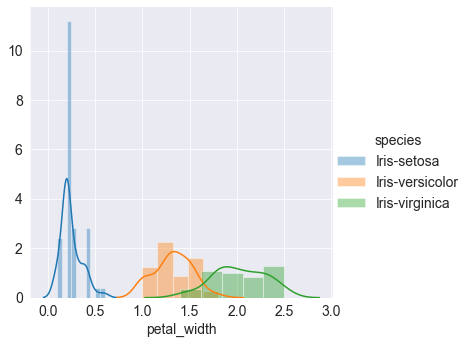

In [84]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"petal_width").add_legend();

We see the setosa is easily seperable while some portions of versicolor and virginica are mixed

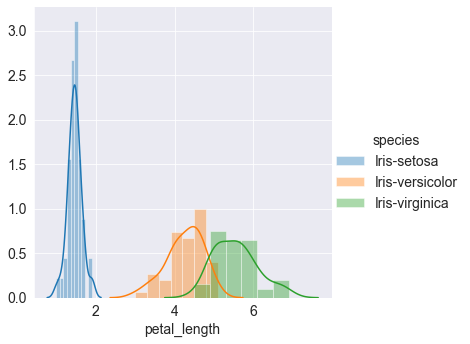

In [85]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"petal_length").add_legend();

Again we see that on the basis of petal length setosa is separable while the other two are still overlapping

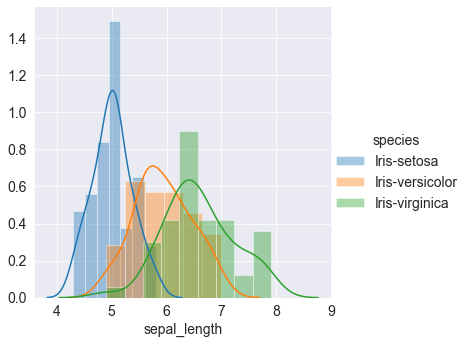

In [86]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"sepal_length").add_legend();

We see it is quite tough to separate the species on the basis of sepal_length alone

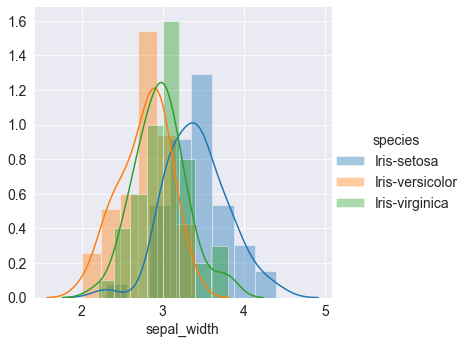

In [87]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"sepal_width").add_legend();

While the overlapping of species is more intense in the case of sepal_width

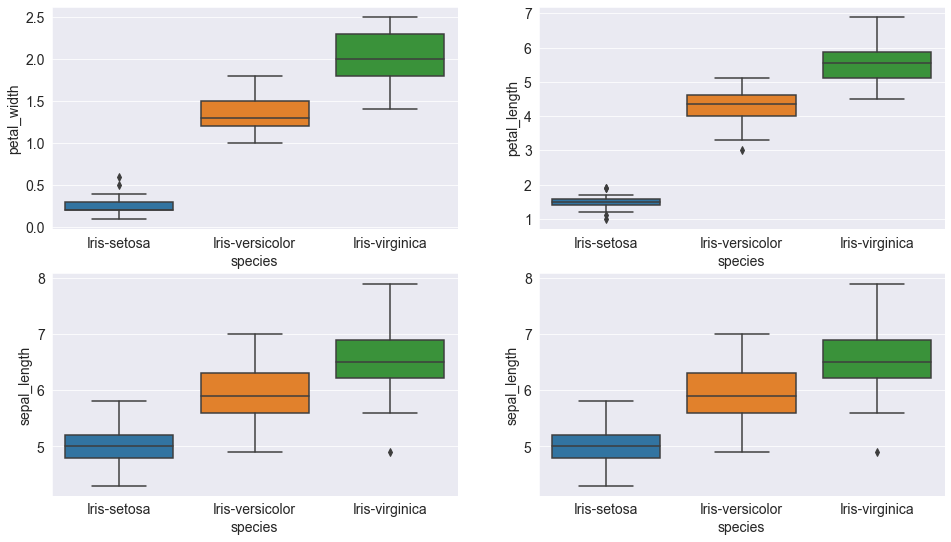

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal_width", x= "species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal_length", x= "species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal_length", x= "species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal_length", x= "species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

- Further we see that the box plots describe that the setosa usually has smaller features with few outliers.
- The versicolor species has average features
- The virginica species has the longest fetures widths and lenghts as compared to others.

We can futher see the distributions using the violin plot on our dataset

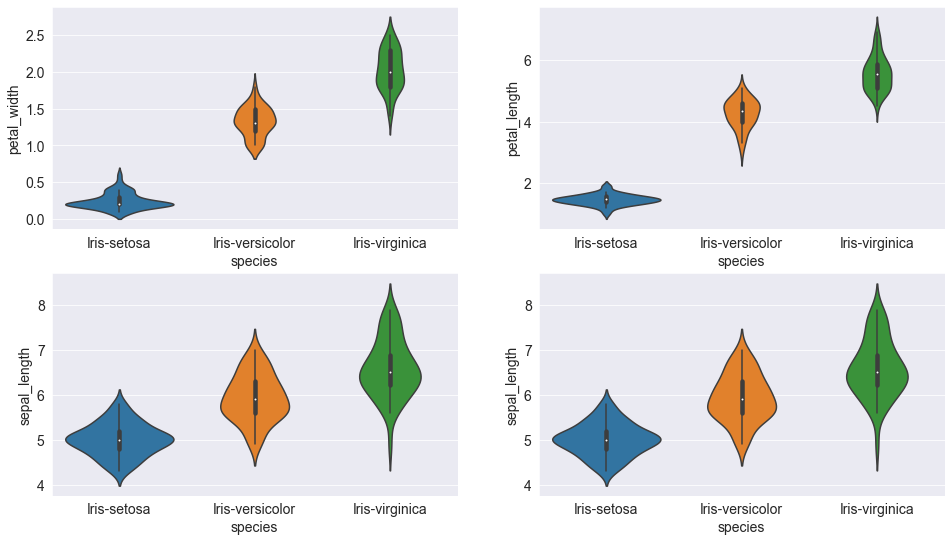

In [95]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="petal_width", x= "species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="petal_length", x= "species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="sepal_length", x= "species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="sepal_length", x= "species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

The kernal density of the data along with the full distribution of the data is shown through the violin plots. We can see the probability density of the various features.

## Conclusion

- The dataset is balanced i.e. equal records are present for all three species.
- We have four numerical columns while just one categorical column which in turn is our target column.
- Strong correlation is present between petal width and petal length.
- The setosa species is the most easily distinguishable becuase of its small feature size.
- The versicolor and virginica species are usually mixed and are sometimes hard to separate, while usually versicolor has average feature sizes and virginica has larger feature sizes.